In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('lin_reg_train.csv')
test = pd.read_csv('lin_reg_test.csv')

In [3]:
train.shape

(800, 4)

In [4]:
train.dtypes

X1    float64
X2    float64
X3    float64
y     float64
dtype: object

In [5]:
train.head()

,X1,X2,X3,y
0,-0.330402,2.531834,1.580030,4.917600
1,0.267946,1.107609,3.382671,1.470638
2,0.306606,0.992819,3.411609,1.357410
3,0.200288,1.804367,2.974268,1.434899
4,-0.479048,1.690462,1.933902,1.111370


In [6]:
train.corr(method='pearson')

,X1,X2,X3,y
X1,1.000000,0.764763,0.468656,0.757333
X2,0.764763,1.000000,0.207756,0.742783
X3,0.468656,0.207756,1.000000,0.453113
y,0.757333,0.742783,0.453113,1.000000


In [7]:
X = train[['X1','X3']]
y = train['y']

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

In [9]:
reg.coef_

array([1.99516544, 0.35143313])

In [10]:
reg.intercept_

2.3909804948548974

In [11]:
X_test = test[['X1', 'X3']]
y_pred = reg.predict(X_test)

In [12]:
from sklearn.metrics import r2_score
r2_score(test['y'], y_pred)

0.58368352898555

Not sure if it is not rounding/similar error, so just in case:

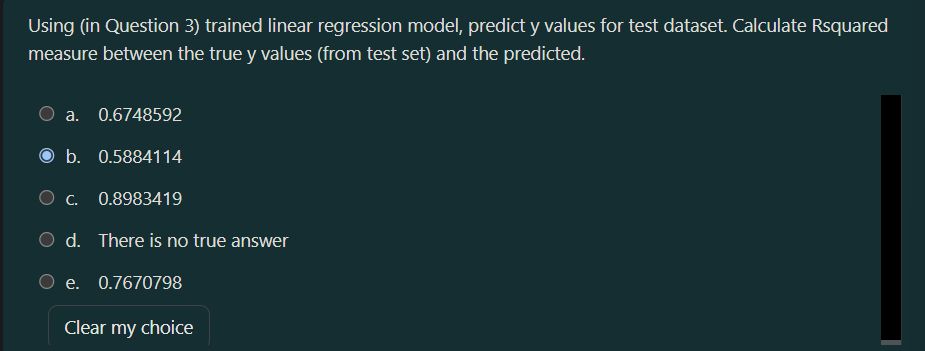

In [13]:
reg.predict(np.array([-1,1]).reshape(1,2))

C:\Users\mariu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.74724819])

In [14]:
X = train[['X1','X2','X3']]
X['X2^2'] = X['X2'] * X['X2']

X_test = test[['X1','X2','X3']]
X_test['X2^2'] = X_test['X2'] * X_test['X2']

y = train['y']
y_test = test['y']

In [15]:
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.8641547236661831

Not sure if this is rounding error:

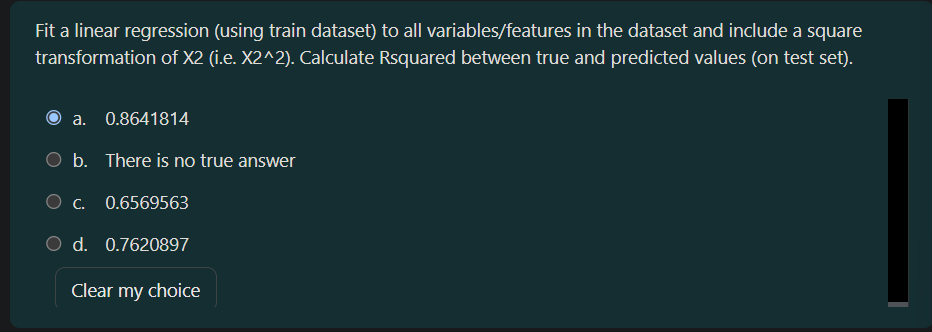

In [16]:
train = pd.read_csv('log_reg_train.csv')
test = pd.read_csv('log_reg_test.csv')

In [17]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
X_train = train[['X2', 'X3']]
y_train = train['y']

X_test = test[['X2', 'X3']]
y_test = test['y']
logreg = LogisticRegression(random_state=123, solver='liblinear', penalty='l1')
# Used those parameters because in the lab asignment other parameters were way off
logreg.fit(X_train, y_train)
y_prob = logreg.predict_proba(X_test)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

In [19]:
logreg = LogisticRegression(random_state=123, solver='liblinear', penalty='l1')
# Used those parameters because in the lab asignment other parameters were way off
logreg.fit(X_train, y_train)
y_prob = logreg.predict_proba(X_test)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.825

Not sure if rounding error...

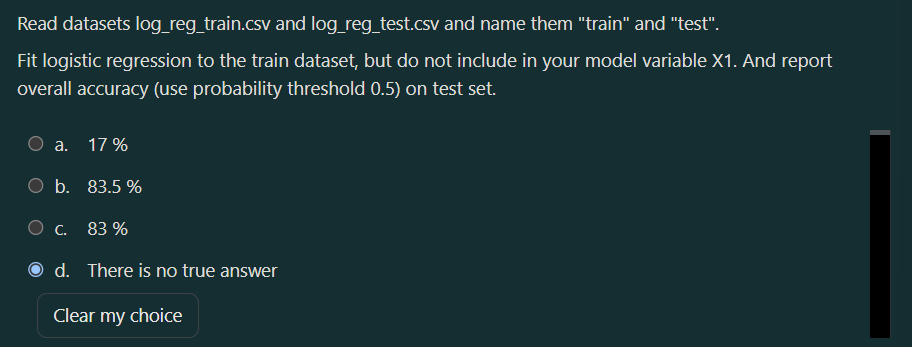

I guess it is..

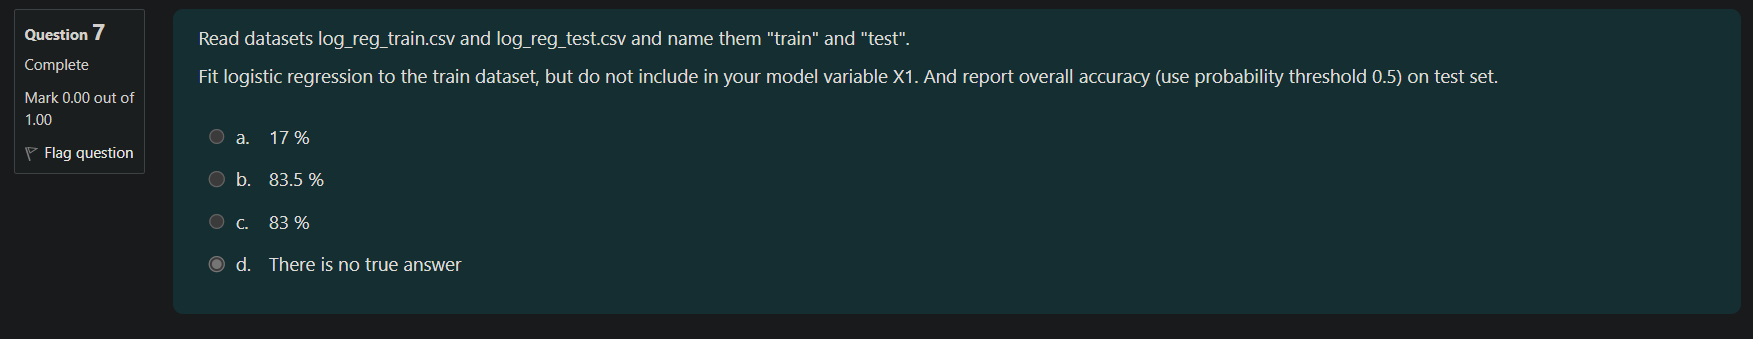

In [20]:
y_prob = np.array([x[1] for x in y_prob])

In [25]:
y_pred = (y_prob > 0.4) * 1

In [28]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.6125    , 0.90833333])

In [34]:
xx = np.array([-1,0]).reshape(1,2)
logreg.predict_proba(xx)

C:\Users\mariu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.98711058, 0.01288942]])

In [37]:
0.01288942 # for P(y=1)

0.01288942

I think it is a mistake in exercise:( :

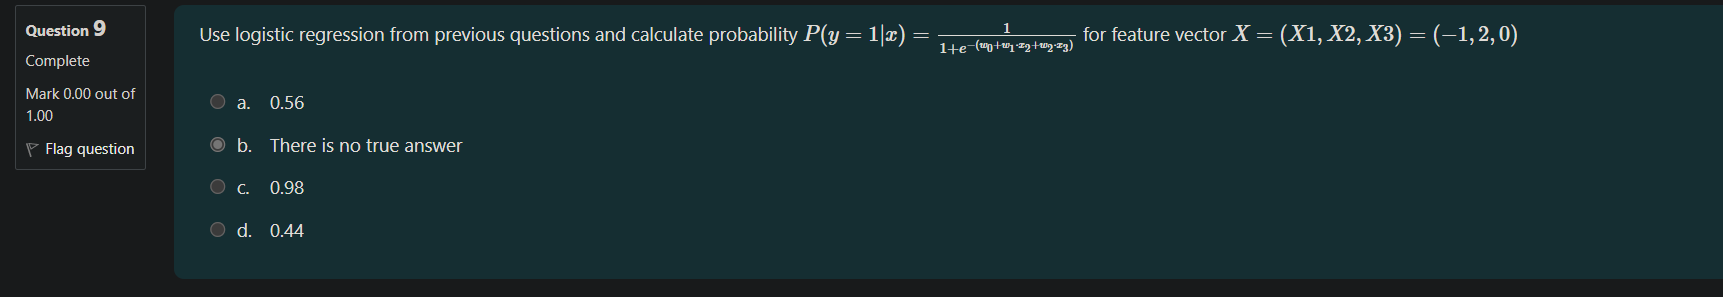

In [38]:
X_train = train[['X1', 'X2']]
y_train = train['y']

X_test = test[['X1', 'X2']]
y_test = test['y']
logreg = LogisticRegression(random_state=123, solver='liblinear', penalty='l1')
# Used those parameters because in the lab asignment other parameters were way off
logreg.fit(X_train, y_train)
y_prob = logreg.predict_proba(X_test)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.81

In [39]:
X_train = train[['X2', 'X3']]
y_train = train['y']

X_test = test[['X2', 'X3']]
y_test = test['y']
logreg = LogisticRegression(random_state=123, solver='liblinear', penalty='l1')
# Used those parameters because in the lab asignment other parameters were way off
logreg.fit(X_train, y_train)
y_prob = logreg.predict_proba(X_test)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.825